In [ ]:
import torch
from torch import nn

#import torch vison
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [ ]:
#getting the datasets

#setting up the training data
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#setting up the testing data
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
image,label=train_data[0]
print(image)
print('\n')
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape is torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

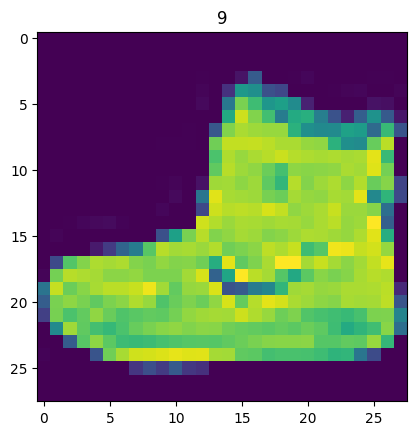

In [ ]:
#visualizing our data
image, label=train_data[0]
print(f'image shape is {image.shape}')

plt.imshow(image.squeeze())
plt.title(label)


Text(0.5, 1.0, 'Ankle boot')

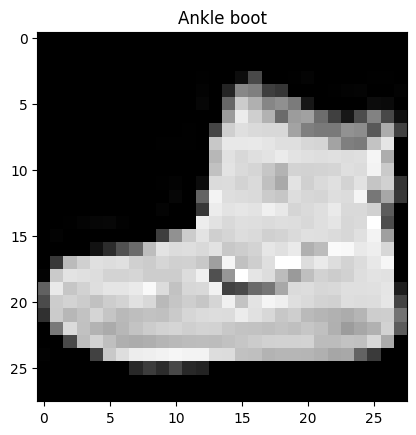

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

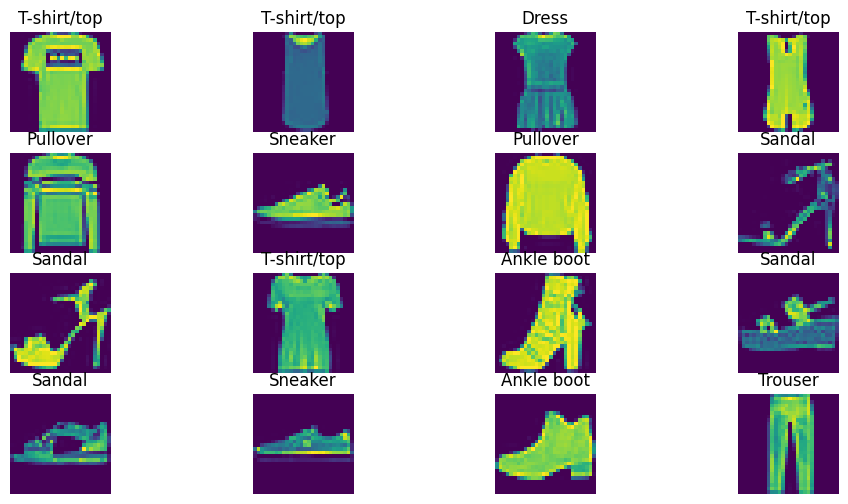

In [ ]:
#plotting more images
torch.manual_seed(42)
fig=plt.figure(figsize=(12,6))
rows, cols=4,4
for i in range(1,rows*cols+1):
  # random_index=torch.randint(0,len(train_data),size=[1]).item()
  # img,label=train_data[random_index]
  img,label=train_data[i]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
#preparing a dataloader
from torch.utils.data import DataLoader

batch_size=32

#turning datasets into iterables(batches)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

#lets check what we have created
print(f'dataloaders: {train_dataloader,test_dataloader}')
print(f'length of train dataloader: {len(train_dataloader)} with batches of {batch_size}')

print(f'length of test dataloader: {len(test_dataloader)} with batches of {batch_size}')

dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c58faba24d0>, <torch.utils.data.dataloader.DataLoader object at 0x7c58faba1b10>)
length of train dataloader: 1875 with batches of 32
length of test dataloader: 313 with batches of 32


In [ ]:
#checking what is inside our train dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size i torch.Size([1, 28, 28])


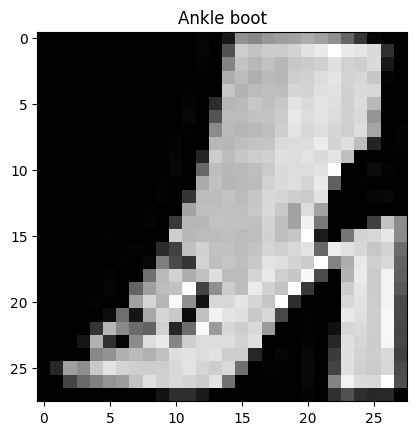

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
print(f'image size i {img.shape}')

In [ ]:
#building a baseline model:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f'shape befor flattening: {x.shape}')

print(f'shape after flattening: {output.shape}')

shape befor flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class fashion(nn.Module):
  def __init__(self, input_shape: int , hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),

        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

#seeting up the model with i/p parameters
model_0=fashion(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

## setting yp loss , optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

#downloading the helper functions
if Path('helper_functions.py').is_file():
  print('helper function already exists')

else:
  print('downloading helper fn')
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

helper function already exists


In [ ]:
#import accuracy matric
from helper_functions import accuracy_fn

#setup loss function and optmzer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:

#creating a function to time our experiments(extra , not compalsary)

from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):

  total_time=end-start
  print(f'train time on {device}: {total_time:.3f} sec')
  return total_time



In [ ]:
#importing tqdm fro progress bar
from tqdm.auto import tqdm

#setup seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

#creating a training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'epoch : {epoch}\n')

  #training
  train_loss=0

  #add the loop to loop through training batches
  model_0.train()

  #forward pass
  for batch, (X,y) in  enumerate(train_dataloader):

    #foward pass
    y_pred=model_0(X)

    #calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #print how many samples have been seen

    if batch%400==0:
      print(f'looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')

  #devide the total train loss by length of dataloader
  train_loss=train_loss/len(train_dataloader)

  #testing
  test_loss, test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred=model_0(X)
      test_loss=test_loss+loss_fn(test_pred,y)
      test_acc=test_acc+accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss=test_loss/len(test_dataloader)
    test_acc=test_acc/len(test_dataloader)


    ## Print out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


#calculating total training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

epoch : 0

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.40054 | Test loss: 0.45744, Test acc: 84.10%

epoch : 1

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.40073 | Test loss: 0.45794, Test acc: 84.18%

epoch : 2

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.39879 | Test loss: 0.46422, Test acc: 84.16%

train time on cpu: 34.409 sec


In [ ]:
#making predictions and get model 0 results
torch.manual_seed(42)
def eval_model(model:nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      #make prediction using the model
      y_pred=model(X)
      #calculate the loss and accuracy per batch
      loss=loss+loss_fn(y_pred,y)
      acc=acc+accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss=loss/len(data_loader)
    acc=acc/len(data_loader)

  return {"model name:": model.__class__.__name__,
          'model loss:': loss.item(),
          'model accuracy:': acc}


 #calculate model 0 results on test dataset
model_0_results=eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results

{'model name:': 'fashion',
 'model loss:': 0.46422305703163147,
 'model accuracy:': 84.15535143769968}

In [ ]:
#settingup device agnostic code

import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

model 1 : building model with non linearity